In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
from tensorflow.keras.datasets import mnist


In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

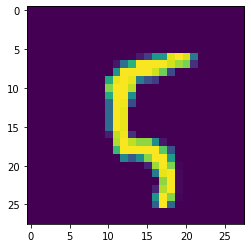

In [4]:
plt.imshow(X_train[100])

In [5]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [6]:
only_8 = X_train[y_train==8]

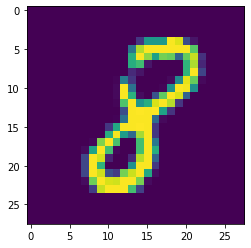

In [7]:
plt.imshow(only_8[20])

In [8]:
only_8.shape

(5851, 28, 28)

In [9]:
import tensorflow as tf

In [10]:
from tensorflow.keras.layers import Dense,Reshape,Flatten,Conv2D,Dropout
from tensorflow.keras.models import Sequential

## Discriminator

In [11]:
discriminator = Sequential()
discriminator.add(Conv2D(64,(3,3),activation='relu',input_shape=[28,28,1]))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(256,activation='relu'))
discriminator.add(Dense(128,activation='relu'))

#FINAL OUTPUT LAYER

discriminator.add(Dense(1,activation='sigmoid'))
discriminator.compile(loss='binary_crossentropy',optimizer='adam')

In [12]:
#discriminator.summary()

In [13]:
coding_size = 100

generator = Sequential()
generator.add(Dense(128,activation = 'relu',input_shape=[coding_size]))
generator.add(Dense(256,activation='relu'))
generator.add(Dense(784,activation='relu'))
generator.add(Reshape([28,28,1]))

In [14]:
generator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               12928     
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               201488    
_________________________________________________________________
reshape (Reshape)            (None, 28, 28, 1)         0         
Total params: 247,440
Trainable params: 247,440
Non-trainable params: 0
_________________________________________________________________


In [15]:
GAN = Sequential([generator,discriminator])

In [16]:
discriminator.trainable =False

In [17]:
GAN.compile(loss='binary_crossentropy',optimizer='adam')

In [18]:
batch_size = 32 

In [19]:
my_data = only_8
my_data=my_data.reshape(-1,28,28,1)

In [20]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=1000)

In [21]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [22]:
dataset = dataset.batch(batch_size,drop_remainder=True)

In [23]:
epochs = 10
GAN.layers

In [24]:
GAN.layers[0].layers

In [25]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 28, 28, 1)         247440    
_________________________________________________________________
sequential (Sequential)      (None, 1)                 11109505  
Total params: 11,356,945
Trainable params: 247,440
Non-trainable params: 11,109,505
_________________________________________________________________


In [26]:
generator , discriminator = GAN.layers
tf.config.experimental_run_functions_eagerly(True)


In [27]:
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i=0
    
    for X_batch in dataset:
        i=i+1
        if i%100==0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        
        #Discriminator
        noise = tf.random.normal(shape=[batch_size,coding_size])
        gen_images = generator(noise)
        X_fake_vs_X_real = tf.concat([gen_images,tf.dtypes.cast(X_batch,tf.float32)],axis=0)
      
        y1 = tf.constant([[0.0]]*batch_size+[[1.0]]*batch_size)
        
        discriminator.trainable = True
        discriminator.train_on_batch(X_fake_vs_X_real,y1)
        
        #Train Generator
        noise = tf.random.normal(shape=[batch_size,coding_size])
        y2 = tf.constant([[1.0]]*batch_size)
        discriminator.trainable = False
        GAN.train_on_batch(noise,y2)
        
        

Currently on Epoch 1
	Currently on batch number 100 of 182
Currently on Epoch 2
	Currently on batch number 100 of 182
Currently on Epoch 3
	Currently on batch number 100 of 182
Currently on Epoch 4
	Currently on batch number 100 of 182
Currently on Epoch 5
	Currently on batch number 100 of 182
Currently on Epoch 6
	Currently on batch number 100 of 182
Currently on Epoch 7
	Currently on batch number 100 of 182
Currently on Epoch 8
	Currently on batch number 100 of 182
Currently on Epoch 9
	Currently on batch number 100 of 182
Currently on Epoch 10
	Currently on batch number 100 of 182


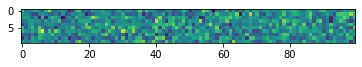

In [28]:
noise = tf.random.normal(shape=[10,coding_size])
plt.imshow(noise)

In [29]:
images = generator(noise)

In [30]:
images = np.array(images)

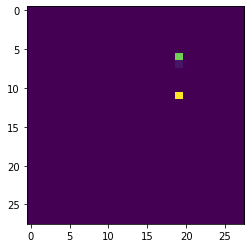

In [34]:
plt.imshow(images[7].reshape(28,28))